<a href="https://colab.research.google.com/github/veda0696-stack/DL-assignment/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

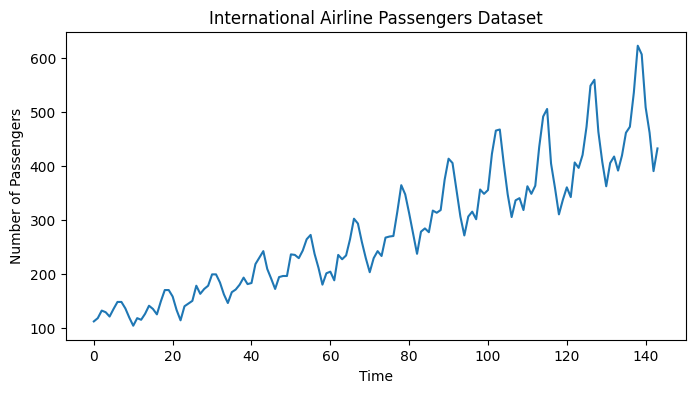

Train size: 108, Test size: 36


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0652
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0156 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0071
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0074 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

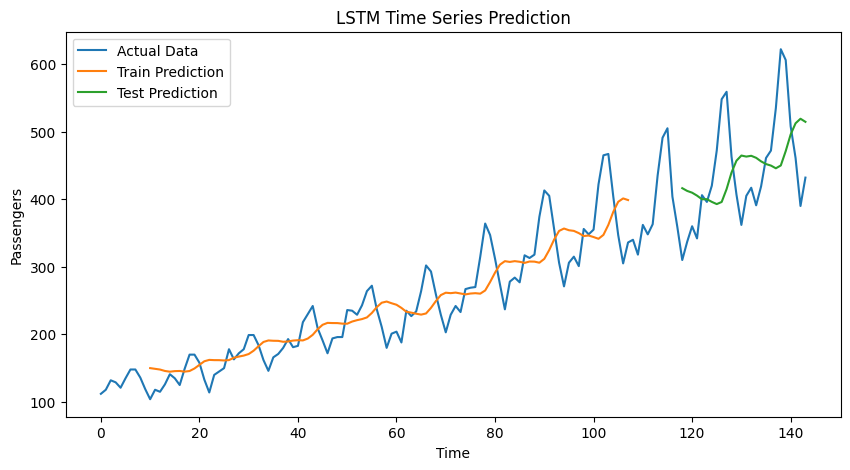

In [6]:
# -*- coding: utf-8 -*-
"""
Optimized LSTM for Airline Passenger Prediction
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# ----------------------------------------------------
# 1. Load Dataset
# ----------------------------------------------------
data = pd.read_csv(
    '/content/airline-passengers.csv',
    engine='python'
)

dataset = data.iloc[:, 1].values.astype("float32").reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers Dataset")
plt.show()


# ----------------------------------------------------
# 2. Normalize Data
# ----------------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# ----------------------------------------------------
# 3. Train-Test Split
# ----------------------------------------------------
train_size = int(len(dataset) * 0.75)
train, test = dataset[:train_size], dataset[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")


# ----------------------------------------------------
# 4. Create Time-Series Dataset
# ----------------------------------------------------
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10

trainX, trainY = create_sequences(train, time_steps)
testX, testY = create_sequences(test, time_steps)

# Reshape input → [samples, timesteps, features]
trainX = trainX.reshape((trainX.shape[0], time_steps, 1))
testX  = testX.reshape((testX.shape[0],  time_steps, 1))


# ----------------------------------------------------
# 5. Build LSTM Model
# ----------------------------------------------------
model = Sequential([
    LSTM(50, input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()
plot_model(model, to_file="lstm_model.png", show_shapes=True)


# ----------------------------------------------------
# 6. Train Model
# ----------------------------------------------------
early_stop = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    trainX,
    trainY,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)


# ----------------------------------------------------
# 7. Predictions
# ----------------------------------------------------
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)

# Inverse scaling
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv   = scaler.inverse_transform(trainY.reshape(-1, 1))

testPredict  = scaler.inverse_transform(testPredict)
testY_inv    = scaler.inverse_transform(testY.reshape(-1, 1))


# ----------------------------------------------------
# 8. RMSE Calculation
# ----------------------------------------------------
trainScore = math.sqrt(mean_squared_error(trainY_inv, trainPredict))
testScore  = math.sqrt(mean_squared_error(testY_inv, testPredict))

print(f"Train RMSE: {trainScore:.2f}")
print(f"Test RMSE : {testScore:.2f}")


# ----------------------------------------------------
# 9. Plot Predictions
# ----------------------------------------------------
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict) + time_steps, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_steps * 2):len(dataset), :] = testPredict

plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(dataset), label="Actual Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.title("LSTM Time Series Prediction")
plt.legend()
plt.show()
